# Activity 1 - Manual PCA vs Scikit-Learn

Why is there a difference between the output of our manual PCA and Scikit-learn?  We will work through it step by step in this activity.

Import the pandas, Numpy, matplotlib plotting library and scikit-learn PCA model

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

Load the dataset and select only the sepal features as per the previous exercises.  Display the first 5 rows of the data.

In [2]:
df = pd.read_csv('iris-data.csv')
df = df[['Sepal Length', 'Sepal Width']]
df.head()

,Sepal Length,Sepal Width
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6


Compute the covariance matrix for the data.

In [3]:
cov = np.cov(df.values.T)
cov

array([[ 0.68569351, -0.03926846],
       [-0.03926846,  0.18800403]])

Transform the data using the scikit-learn API and only the first principal component.  Store the transform in the variable *sklearn_pca*.

In [4]:
model = PCA(n_components=1)
sklearn_pca = model.fit_transform(df.values)

Transform the data using the manual PCA and only the first principal component.  Store the transform in the variable *manual_pca*.

In [5]:
eigenvectors, eigenvalues, _ = np.linalg.svd(cov, full_matrices=False)
P = eigenvectors[0]
manual_pca = P.dot(df.values.T)

Plot the *sklearn_pca* and *manual_pca* values on the same plot to visualise the difference.

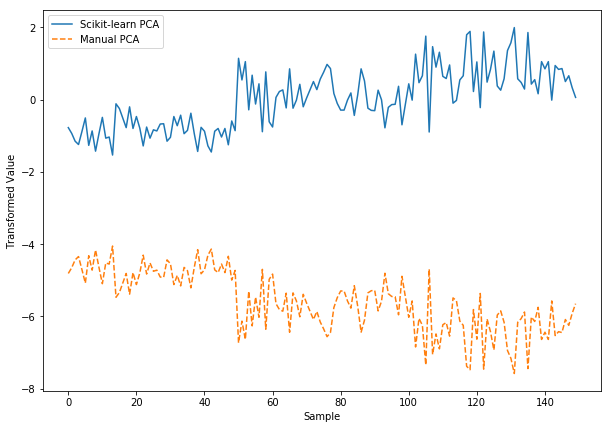

In [6]:
plt.figure(figsize=(10, 7));
plt.plot(sklearn_pca, label='Scikit-learn PCA');
plt.plot(manual_pca, label='Manual PCA', linestyle='--');
plt.xlabel('Sample');
plt.ylabel('Transformed Value');
plt.legend();

Notice that the two plots look almost identical except that one is a mirror image of another and there is an offset between the two.  

Display the components of the *sklearn_pca* and *manual_pca* models

In [7]:
model.components_

array([[ 0.99693955, -0.07817635]])

In [8]:
P

array([-0.99693955,  0.07817635])

Notice the difference in sign, the values are identical but the signs are different producing the mirror image result.  This is just a difference in convention, nothing meaningful.

Multiply the *manual_pca* models by -1 and re-plot.

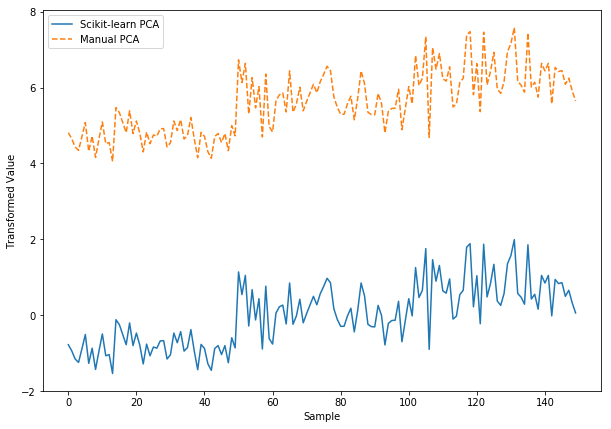

In [9]:
manual_pca *= -1
plt.figure(figsize=(10, 7));
plt.plot(sklearn_pca, label='Scikit-learn PCA');
plt.plot(manual_pca, label='Manual PCA', linestyle='--');
plt.xlabel('Sample');
plt.ylabel('Transformed Value');
plt.legend();

Now all we need to do is deal with the offset between the two.  The scikit-learn API subtracts the mean of the data prior to the transform; subtract the mean of each column from the dataset before completing the transform with manual PCA.

In [10]:
mean_vals = np.mean(df.values, axis=0)
offset_vals = df.values - mean_vals
manual_pca = P.dot(offset_vals.T)

Multiply the result by -1

In [11]:
manual_pca *= -1

Re-plot the individual *sklearn_pca* and *manual_pca* values.

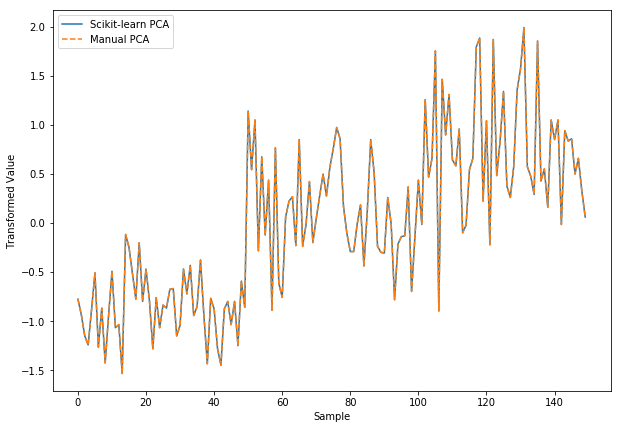

In [12]:
plt.figure(figsize=(10, 7));
plt.plot(sklearn_pca, label='Scikit-learn PCA');
plt.plot(manual_pca, label='Manual PCA', linestyle='--');
plt.xlabel('Sample');
plt.ylabel('Transformed Value');
plt.legend();